# **Membuat Model NLP dengan TensorFlow**

**Nama : Imam Sasongko Jati** 




**Kelas :  Belajar Pengembangan Machine Learning** 

Menyiapkan dataset Video Game Sales yang telah di unduh dari situs Kaggle [teks link](https://www.kaggle.com/gregorut/videogamesales), serta memilih kolom yang akan digunakan

In [154]:
import pandas as pd
df = pd.read_csv('vgsales.csv')
df = df[['Name','Genre']]

In [155]:
df

,Name,Genre
0,Wii Sports,Sports
1,Super Mario Bros.,Platform
2,Mario Kart Wii,Racing
3,Wii Sports Resort,Sports
4,Pokemon Red/Pokemon Blue,Role-Playing
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,Platform
16594,Men in Black II: Alien Escape,Shooter
16595,SCORE International Baja 1000: The Official Game,Racing
16596,Know How 2,Puzzle


Melakukan proses One-Hot-Encoding karena label data masih berupa kategorikal dan membuat dataframe baru.

In [156]:
category = pd.get_dummies(df.Genre)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='Genre')
df_new

,Name,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Wii Sports,0,0,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,0,0,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,0,0,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,0,0,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0,0,0,0,1,0,0,0,0,0,0,0
16594,Men in Black II: Alien Escape,0,0,0,0,0,0,0,0,1,0,0,0
16595,SCORE International Baja 1000: The Official Game,0,0,0,0,0,0,1,0,0,0,0,0
16596,Know How 2,0,0,0,0,0,1,0,0,0,0,0,0


Merubah nilai-nilai dari dataframe ke dalam bentuk Numpy Array dengan cara menggunakan atribut values agar data dapat diproses oleh model.

In [157]:
name = df_new['Name'].values
label = df_new[['Action', 'Adventure', 'Fighting', 'Misc', 'Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']].values

Membagi dataset menjadi data validasi 20% dan data training 80% menggunakan fungsi split.

In [158]:
from sklearn.model_selection import train_test_split
name_train, name_val, label_train, label_val = train_test_split(name, label, test_size=0.2)

Mengecek jumlah data yang di split apakah sudah sesuai dengan yang di kehendaki.

In [159]:
print('Jumlah data train = ',len(name_train) )
print('Jumlah data validasi = ',len(name_val) )
print('Jumlah total data = ',len(name_train)+len(name_val))

Jumlah data train =  13278
Jumlah data validasi =  3320
Jumlah total data =  16598


Mengubah dataset ke bentuk numerik dengan menggunakan fungsi Tokenizer dan selanjutnya mengkonversi setiap sample ke dalama sequence.

In [160]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(name_train) 
tokenizer.fit_on_texts(name_val)
 
sekuens_train = tokenizer.texts_to_sequences(name_train)
sekuens_val = tokenizer.texts_to_sequences(name_val)
 
padded_train = pad_sequences(sekuens_train) 
padded_val = pad_sequences(sekuens_val)

Membuat model menggunakan layer Embedding dengan dimensi Embedding sebesar 128 serta dimensi input sebesar num_word pada proses tokenizer sebesar 5000, fungsi compile dengan loss function='categorical_crossentropy' dan optimizer = 'adam', serta menambahkan layer LSTM dan mengisi parameter dengan jumlah output 64.

In [161]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=128),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Melatih model yang telah dibuat dengan fungsi fit dan jumlah pelatihan/epoch sebanyak 20x.

In [162]:
history = model.fit(padded_train, label_train, 
                    epochs=20, 
                    validation_data=(padded_val, label_val), verbose=2)

Epoch 1/20
415/415 - 24s - loss: 1.8516 - accuracy: 0.3910 - val_loss: 1.2777 - val_accuracy: 0.6054
Epoch 2/20
415/415 - 9s - loss: 0.8960 - accuracy: 0.7378 - val_loss: 0.9700 - val_accuracy: 0.7193
Epoch 3/20
415/415 - 9s - loss: 0.5714 - accuracy: 0.8301 - val_loss: 0.9556 - val_accuracy: 0.7377
Epoch 4/20
415/415 - 8s - loss: 0.4369 - accuracy: 0.8651 - val_loss: 1.0095 - val_accuracy: 0.7398
Epoch 5/20
415/415 - 8s - loss: 0.3567 - accuracy: 0.8867 - val_loss: 1.0443 - val_accuracy: 0.7422
Epoch 6/20
415/415 - 8s - loss: 0.2956 - accuracy: 0.9030 - val_loss: 1.1165 - val_accuracy: 0.7479
Epoch 7/20
415/415 - 9s - loss: 0.2480 - accuracy: 0.9153 - val_loss: 1.2468 - val_accuracy: 0.7476
Epoch 8/20
415/415 - 9s - loss: 0.2153 - accuracy: 0.9269 - val_loss: 1.2958 - val_accuracy: 0.7521
Epoch 9/20
415/415 - 8s - loss: 0.1960 - accuracy: 0.9332 - val_loss: 1.3534 - val_accuracy: 0.7515
Epoch 10/20
415/415 - 8s - loss: 0.1668 - accuracy: 0.9422 - val_loss: 1.5523 - val_accuracy: 0.753

Plot loss dan akurasi pada saat training dan validation

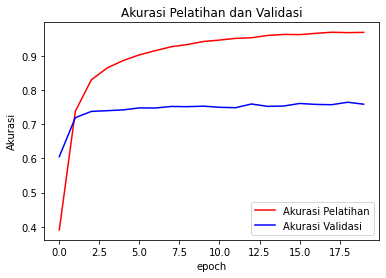

<Figure size 432x288 with 0 Axes>

In [163]:
import matplotlib.pyplot as plt


loss = history.history['loss']
acc = history.history['accuracy']
val_los = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Pelatihan')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.xlabel('epoch')
plt.ylabel('Akurasi')
plt.legend(loc=0)
plt.figure()


plt.show()

Membuat kelas callback untuk membuat pelatihan berhenti ketika akurasi sebesar 85% telah tercapai

In [164]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nAkurasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks = myCallback()

Melatih model dengan disertai callback agar ketika akurasi 85% tercapai pelatihan model akan berhenti.

In [165]:
history = model.fit(padded_train, label_train, 
                    epochs=20, 
                    validation_data=(padded_val, label_val), verbose=2, callbacks=[callbacks])

Epoch 1/20
415/415 - 8s - loss: 0.0920 - accuracy: 0.9696 - val_loss: 2.1270 - val_accuracy: 0.7593

Akurasi telah mencapai >85%!
